# Dealing with the pain that is the class imbalance 

Counter({0: 9900, 1: 100})


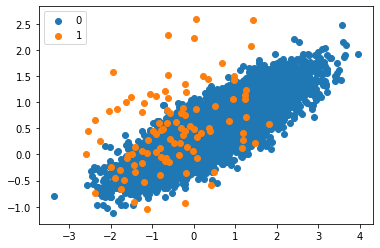

In [17]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                            n_clusters_per_class=1,class_sep=.5, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## OverSampling is my passion

### SMOTE 


In [18]:
#start over sampling 
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


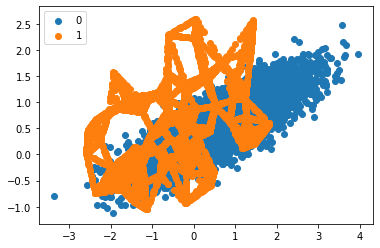

In [19]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### ADASYN
Adaptive Synthetic sampling 

Counter({0: 9900, 1: 100})
Counter({1: 9924, 0: 9900})


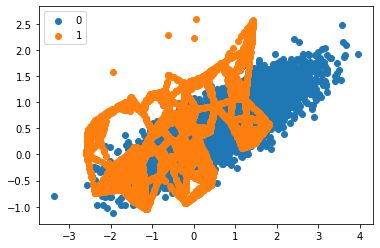

In [20]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99],class_sep=.5, flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Undersampling the  Majority class along while oversampling the Minority class

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


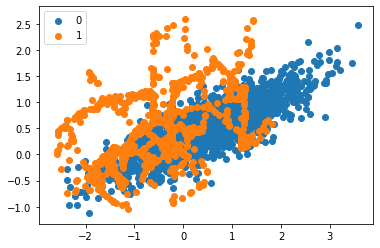

In [22]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], class_sep=.5,flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)



# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)



# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


### Training a model

In [14]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression 

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                            n_clusters_per_class=1,class_sep=.5, weights=[0.9], flip_y=0, random_state=1)
# define model
model = LogisticRegression()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Min\tROC AUC: %.3f' % min(scores))
print('Mean\tROC AUC: %.3f' % mean(scores))
print('Max\tROC AUC: %.3f' % max(scores))

Min	ROC AUC: 0.731
Mean	ROC AUC: 0.797
Max	ROC AUC: 0.861


### Training the model with SMOTE 

In [15]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression 

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                            n_clusters_per_class=1,class_sep=.5, weights=[0.9], flip_y=0, random_state=1)
# define model
model = LogisticRegression()

#create SMOTE pipeline
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Min\tROC AUC: %.3f' % min(scores))
print('Mean\tROC AUC: %.3f' % mean(scores))
print('Max\tROC AUC: %.3f' % max(scores))

Min	ROC AUC: 0.753
Mean	ROC AUC: 0.807
Max	ROC AUC: 0.865
